## Data Preparing

In [2]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torch.utils.data import random_split

In [3]:
trans = transforms.Compose([transforms.Resize((224, 224)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                            ])
trainset = torchvision.datasets.ImageFolder(root = "./Renewed_Dataset",
                                            transform = trans)

In [4]:
trainset.__getitem__(18)

(tensor([[[ 0.1529,  0.1451,  0.1451,  ...,  0.7176,  0.7098,  0.7098],
          [ 0.1529,  0.1529,  0.1451,  ...,  0.7176,  0.7098,  0.7176],
          [ 0.1608,  0.1529,  0.1451,  ...,  0.7176,  0.7098,  0.7176],
          ...,
          [ 0.1529,  0.1294,  0.0980,  ..., -0.4667, -0.5059, -0.4510],
          [ 0.0588,  0.0196,  0.1294,  ..., -0.5373, -0.4588, -0.2706],
          [ 0.0196, -0.0431, -0.0039,  ..., -0.4745, -0.5294, -0.5059]],
 
         [[ 0.4275,  0.4196,  0.4275,  ...,  0.8118,  0.8196,  0.8196],
          [ 0.4275,  0.4196,  0.4275,  ...,  0.8118,  0.8196,  0.8275],
          [ 0.4275,  0.4275,  0.4275,  ...,  0.8118,  0.8196,  0.8275],
          ...,
          [ 0.0118,  0.0118, -0.0275,  ..., -0.4353, -0.4667, -0.3882],
          [-0.0667, -0.0980,  0.0039,  ..., -0.4980, -0.4118, -0.2078],
          [-0.0980, -0.1608, -0.1216,  ..., -0.4196, -0.4745, -0.4510]],
 
         [[ 0.7490,  0.7490,  0.7569,  ...,  0.9373,  0.9216,  0.9216],
          [ 0.7647,  0.7647,

In [5]:
len(trainset)

1200

In [6]:
classes = trainset.classes
classes

['adress', 'backswing', 'backswingtop', 'finish', 'follow', 'impact']

## Data Upload Via DataLoader

In [7]:
trainset, testset = random_split(trainset, [960, 240])
print(len(trainset), len(testset))

960 240


In [8]:
testset, valset = random_split(testset, [120, 120])
print(len(testset), len(valset))

120 120


In [9]:
batch_size = 8
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2) # 훈련용
validloader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2) # 검증용
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2) # 테스트용

In [10]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)

tensor([5, 2, 2, 2, 2, 4, 2, 4])


## Image Visualization

In [11]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))

    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

torch.Size([8, 3, 224, 224])
(3, 454, 906)
(454, 906, 3)
torch.Size([8, 3, 224, 224])
torch.Size([3, 228, 1810])
impact backswingtop backswingtop backswingtop 


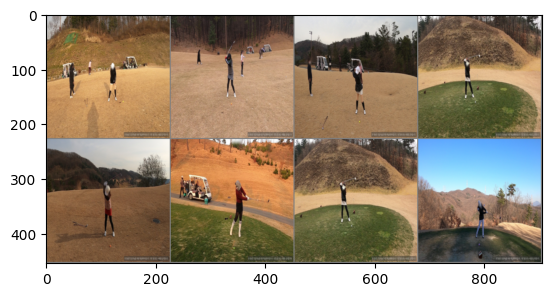

In [12]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(4)))

## Dataset Verification Via Visualization

In [13]:
print(type(trainset[0][0]), type(trainset[0][1]))

<class 'torch.Tensor'> <class 'int'>


In [14]:
trainset[0][0].size()

torch.Size([3, 224, 224])

In [15]:
# 1번 샘플
sample_img = trainset[1][0]
sample_img.size()

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


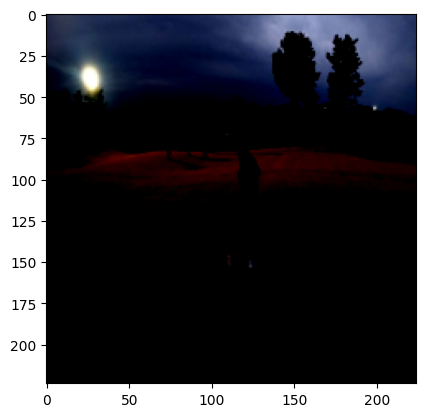

In [16]:
plt.imshow(sample_img.permute(1, 2, 0))

In [17]:
trainset[1][1]

5

- numpy로 변환한 뒤 matplotlib으로 표시할 경우

In [18]:
sample_img.size()

torch.Size([3, 224, 224])

In [19]:
numpy_sample = sample_img.numpy()
numpy_sample.shape

(3, 224, 224)

In [20]:
type(numpy_sample)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


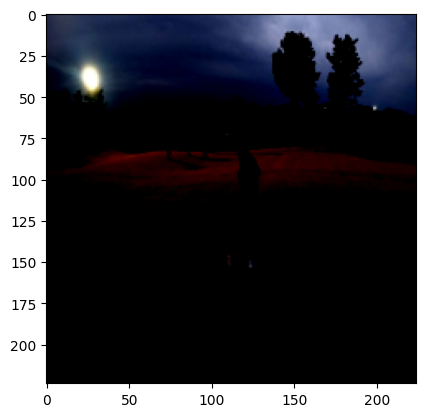

In [21]:
plt.imshow(numpy_sample.transpose(1, 2, 0)) # 차원 순서 변경할 때 tensor는 permute, ndarray는 transpose

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


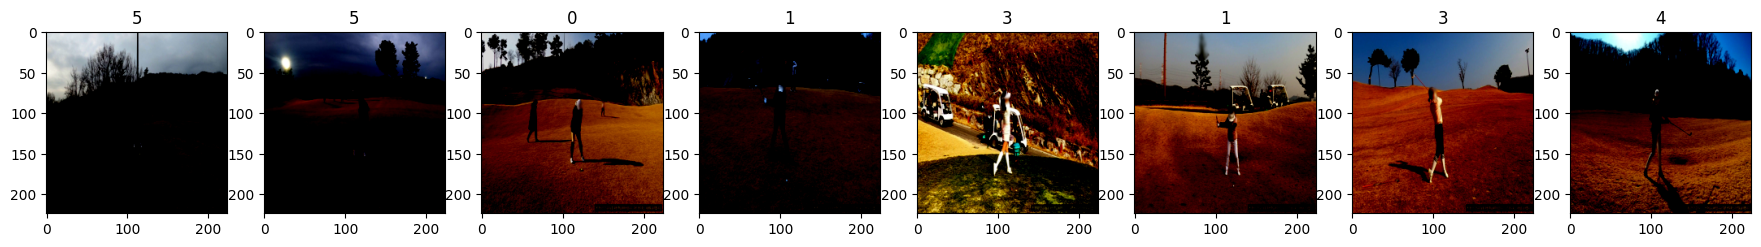

In [22]:
figure, axes = plt.subplots(nrows=1, ncols=8, figsize=(22, 6))
for i in range(8):
  axes[i].imshow(trainset[i][0].permute(1, 2, 0), cmap='gray')
  axes[i].set_title(trainset[i][1])   

## Data Separation

**trainset**

In [23]:
sample_img = testset[100][0]
sample_img.size()

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


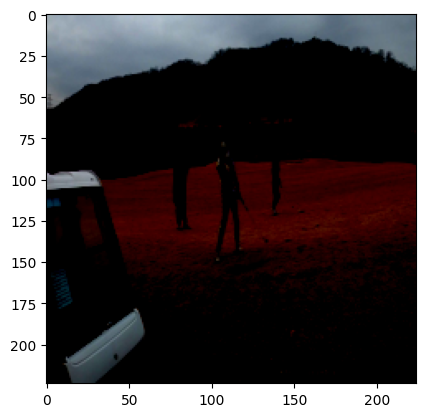

In [24]:
plt.imshow(sample_img.permute(1, 2, 0))

In [25]:
testset[100][0].size(), testset[100][1]

(torch.Size([3, 224, 224]), 5)

In [26]:
trainset[600][0].size(), trainset[600][1]

(torch.Size([3, 224, 224]), 5)

**testset, valset**

In [27]:
sample_img1 = valset[100][0]
sample_img1.size()

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


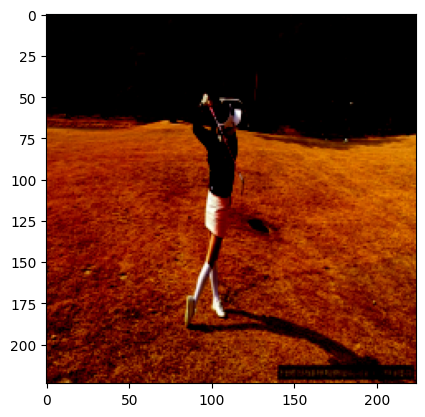

In [28]:
plt.imshow(sample_img1.permute(1, 2, 0))

In [29]:
valset[100][0].size(), valset[100][1]

(torch.Size([3, 224, 224]), 3)

In [30]:
valset[20][0].size(), valset[20][1]

(torch.Size([3, 224, 224]), 5)

#### More Variable Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


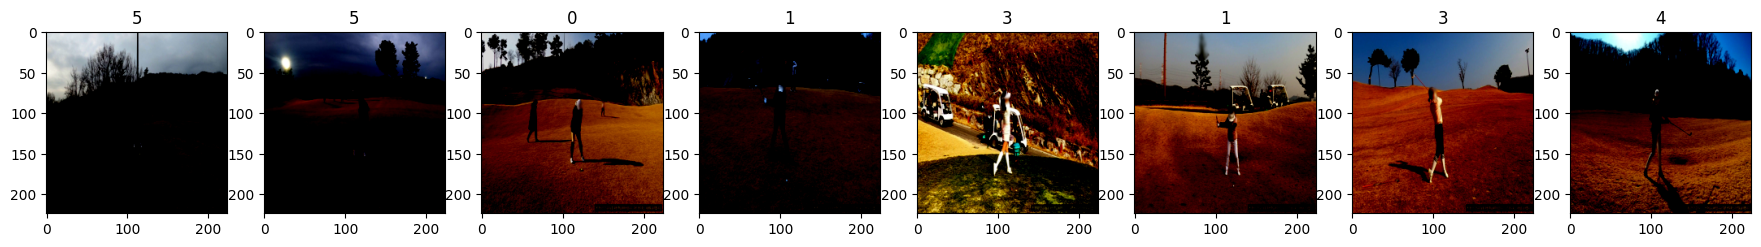

In [31]:
figure, axes = plt.subplots(nrows=1, ncols=8, figsize=(22, 6))
for i in range(8):
  axes[i].imshow(trainset[i][0].permute(1, 2, 0), cmap='gray')
  axes[i].set_title(trainset[i][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

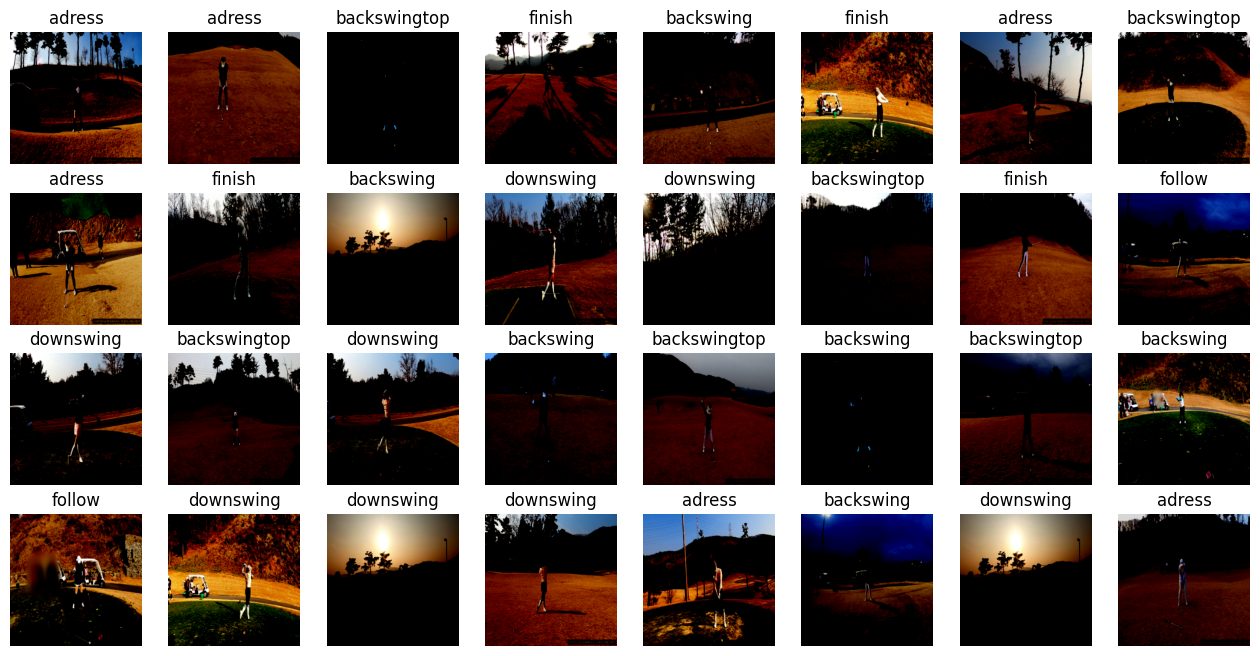

In [32]:
labels_map = {0 : 'adress', 1 : 'backswing', 2: 'backswingtop', 3: 'downswing', 4: 'finish', 5: 'follow', 6: 'impact', 7: 'takeback'}

figure, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
axes = axes.flatten()

for i in range(32):
    rand_i = np.random.randint(0, len(trainset))
    image = trainset[rand_i][0].permute(1, 2, 0)
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(labels_map[trainset[rand_i][1]])    

## Model Organization

In [33]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
import copy
import sys, time
from torch.autograd import Variable

In [40]:
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13_bn', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19_bn', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [41]:
from torchsummary import summary
summary(model.cuda(), (3,224,224))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [42]:
class TrainModel():
    def __init__(self,model, criterion, optimizer, trainloader, testloader, num_epochs=10):
        
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        self.model = model.to(self.device)
        self.trainloader =trainloader
        self.testloader = testloader
        self.criterion = criterion
        self.optimizer = optimizer
        self.num_epochs = num_epochs
        self.best_acc_wts = copy.deepcopy(self.model.state_dict())
        self.best_acc =0.0

        
        for epoch in range(1, self.num_epochs+1):
            print('Epoch {}/{}'.format(epoch, self.num_epochs))
            self.train()
            self.test()

        model.load_state_dict(self.best_acc_wts)

    def train(self):
        self.model.train()
        train_loss = 0
        correct = 0
        total = 0
        for batch_idx, (inputs, targets) in enumerate(self.trainloader):
            inputs, targets = inputs.to(self.device), targets.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets.long())
            loss.backward()
            self.optimizer.step()

            train_loss += loss.data.cpu().numpy()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        epoch_loss = train_loss /len(self.trainloader)
        epoch_acc = correct / total
        print('train | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))

    def test(self):
        global best_acc
        self.model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(self.testloader):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets.long())

                test_loss += loss.data.cpu().numpy()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

            epoch_loss = test_loss /len(self.testloader)
            epoch_acc = correct / total
            print('test | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))
            if epoch_acc >= self.best_acc:
                self.best_acc = epoch_acc
                self.best_acc_wts = copy.deepcopy(self.model.state_dict())

In [43]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [44]:
TrainModel(model, criterion=criterion, optimizer=optimizer,trainloader=trainloader,testloader=validloader,num_epochs=10)

Epoch 1/10
train | Loss: nan Acc: 0.1635
test | Loss: nan Acc: 0.1000
Epoch 2/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 3/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 4/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 5/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 6/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 7/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 8/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 9/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000
Epoch 10/10
train | Loss: nan Acc: 0.1698
test | Loss: nan Acc: 0.1000


In [45]:
def test(model,testloader,criterion):
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs,targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets.long())     

                test_loss += loss.data.cpu().numpy()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
            epoch_loss = test_loss / len(testloader)
            epoch_acc = correct / total
            print('test | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))

test(model,testloader,criterion)

test | Loss: nan Acc: 0.2083


In [46]:
print('Gradient Vanishing 발생 VGG CUT!!')

Gradient Vanishing 발생 VGG CUT!!
